In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
boston_class_tags=boston["feature_names"]
# boston_class_tags=["犯罪率", "大土地比率", "非零售土地", "是否接近河", "NO濃度", "房間", 
#                    "自住老房比例", "就業距離", "高速公路距離", "房屋稅率", "學生教師比", "黑人比", "低收比"]

In [6]:
# print(boston["DESCR"])

In [7]:
# 考古題和驗證題分開來
from sklearn.model_selection import train_test_split
# 回傳: [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size=0.1)

In [8]:
# 第一步: 做考古題
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
# 訓練考古題
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

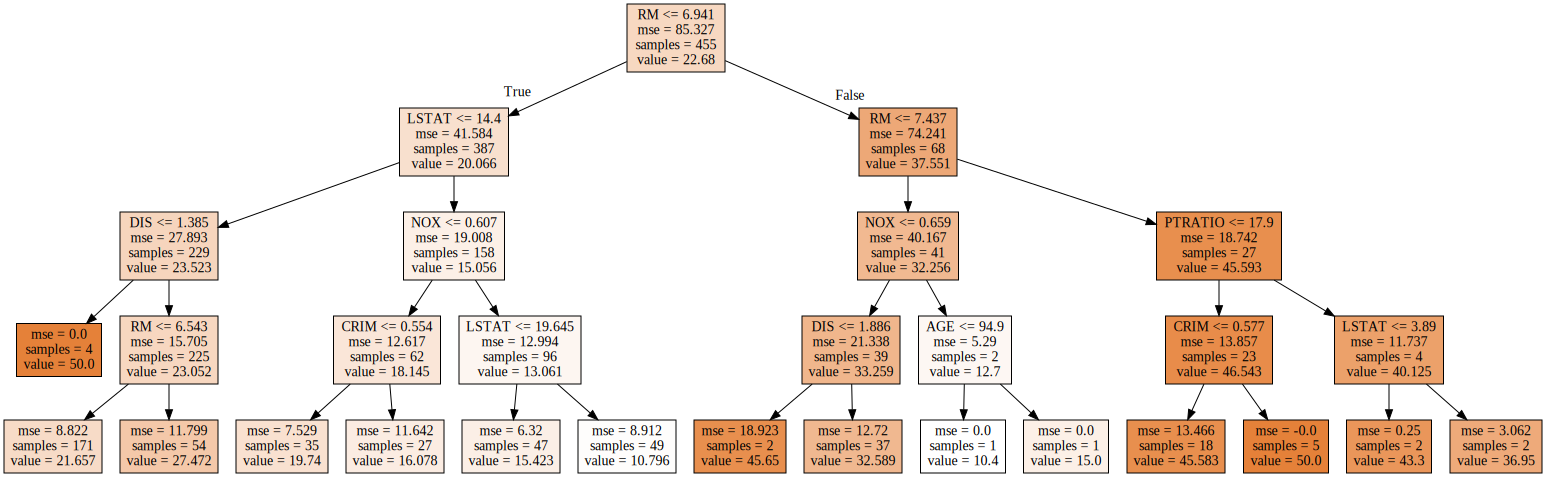

In [14]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, feature_names=boston_class_tags, filled=True)
result = graphviz.Source(g)
result.render("boston")
result

In [10]:
# 第二步: 驗證一下公式好壞
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("r2 score:", r2_score(y_test, pre))

r2 score: 0.7370184801977746
